<a href="https://colab.research.google.com/github/MMRES-PyBootcamp/MMRES-python-bootcamp2021/blob/master/05_Plotting_DataVis_Exploration_simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 Plotting, Data Visualization and Exploration: a random walk exploration

*Disclaimer: The "Plotting" section of this session is based in [this](https://github.com/peterwittek/qml-rg/blob/master/Archiv_Session_Spring_2017/Tutorials/Python_for_Science.ipynb) tutorial by Peter Wittek*

## Introduction

In this session, we will explore the tools that Python offers to plot and visualize data. The *art* of making nice plots is something that takes some time, but making our first plots is really simple. In this tutorial, we will focus in the library [Matplotlib](http://matplotlib.org/), which is, probably together with `numpy` or `pandas`, the package that you will always need to import in most of your projects. 

In order to see its full potential, we will use it to explore a precise problem which lays at the heart of statistics: the [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion). This session will then have two steps: first, we will learn the basics of Matplotlib; second, we will study how to go from a purely theoretical problem to its numerical simulation and use Matplotlib to visualize the results.

Let's start by importing the necessary packages. For the initial part of this tutorial, we will only need on class of Matplotlib, `pyplot`, which has most of what we usually need for plotting:

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print('Matplotlib:', matplotlib.__version__)
print('Numpy:', np.__version__)

Matplotlib: 3.2.2
Numpy: 1.19.5


Notice the line that starts with %. This is a 'magic command' specific to Jupyter. It ensures that images will be plotted inline, instead of popping up in a window. You can look at all magic commands by entering `%quickref`. Some are useful, although most of them are not. The magic commands are not part of Python, so calling them in a script will throw an error. Keep this in mind when you copy code from a notebook.

## Plotting


#### The Basics

This is the bare minimum you need to plot a function:

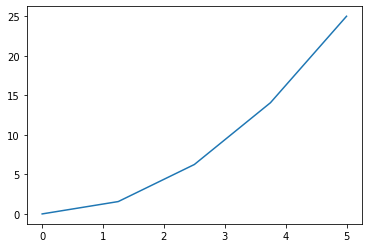

In [ ]:
x = np.linspace(0, 5, 5)
plt.plot(x, x**2);

We imported the module `matplotlib.plot` as `plt`, and we call a function of it called `plot` to plot the square function. You always plot discrete points: `x` is a numpy array containing five points as a linear approximation between zero and five. On closer inspection, the curve is not smooth: this is because five points are not enough for the illusion of smoothness. Let us add some more points, labels for the axes, and a title for the figure:

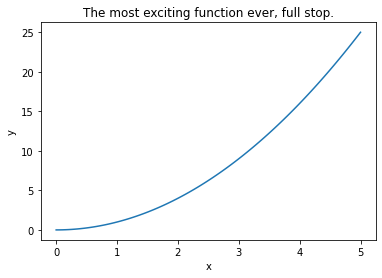

In [ ]:
x = np.linspace(0, 5, 100)
y = x**2
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('The most exciting function ever, full stop.');

We can check in more detail by changing the line style of the lines as follows:

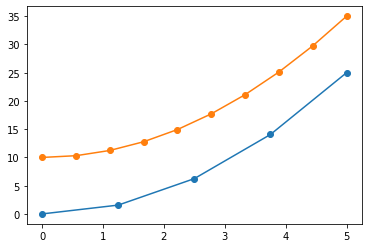

In [ ]:
x = np.linspace(0, 5, 5)
plt.plot(x, x**2, 'o-');

x = np.linspace(0, 5, 10)
plt.plot(x, 10+x**2, 'o-')

The order in which you add the decorations to your figure does not matter. Everything that you write to appear in the cell will appear. This is because the execution of the cell triggers the call of the function `plt.show()`, which instructs Matplotlib to draw the figure *and* display it. In a Python script, you would always call `plt.show()` manually. Let us plot the cube function too, and call `plt.show()` manually:

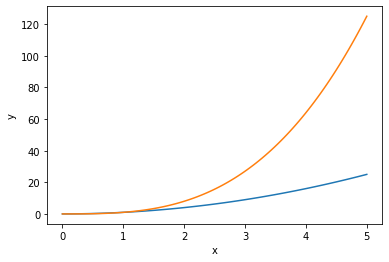

In [ ]:
x = np.linspace(0, 5, 100)
y1 = x**2
y2 = x**3
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can use this to check what happens when taking more or less points for the plots, by changing the line style as:

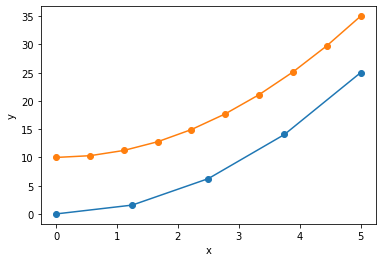

In [ ]:
x = np.linspace(0, 5, 5)
plt.plot(x, x**2, 'o-');

x = np.linspace(0, 5, 10)
plt.plot(x, 10+x**2, 'o-')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Other useful line styles:

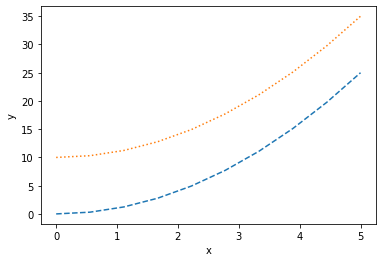

In [ ]:
x = np.linspace(0, 5, 10)
plt.plot(x, x**2, ls = '--');

x = np.linspace(0, 5, 10)
plt.plot(x, 10+x**2, ls = ':')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Notice the difference with this case:

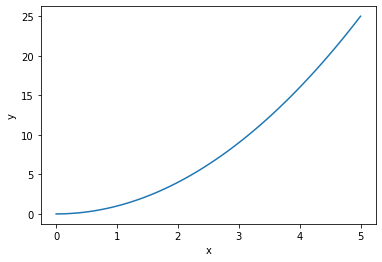

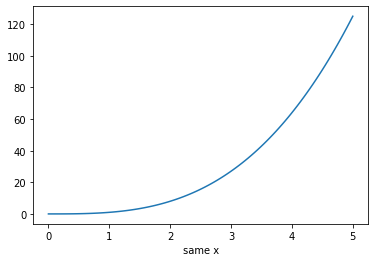

In [ ]:
x = np.linspace(0, 5, 100)

plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.xlabel('same x')
plt.plot(x, y2)
plt.show()

The `plt.show()` resets all settings after displaying, so for the second figure, you must set the axes again (note the difference in axes labels)

Instead of showing the plot on the screen, you can write them to a file, which will also trigger Matplotlib to draw the figure. If you export it to PDF, it will be as scale-invariant as it can possibly be.

In [ ]:
plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('whatever.pdf')
plt.close()

You should find the plot right in the directory of the notebook.

#### Object-oriented Paradigm

The image that you see displayed is composed of a hierarchical structure of components. On the top level, it is an instance of the `Figure` class. This is what `plt.plot()` creates for you, with all the other underlying structures within; this function is for your convenience to avoid dealing with classes if you want a simple plot. The structures in the hierarchy include the area where you draw, which is technically called the `Axes` class. You may have more than one `Axes` if you have subplots or embedded plots. `Axes` than have x and y axes, which in turn have a scale, ticks, labels, and so on. If you have a single `Axes` class instantiated, like in the examples below, you can access and change most parts of the hierarchy like you did above with the x and y labels and the figure title. If you want to do anything non-trivial, you have to compose the figure and its components yourself. The examples in this section are mainly from [this tutorial](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb). A more detailed version of the plot of the square function is:

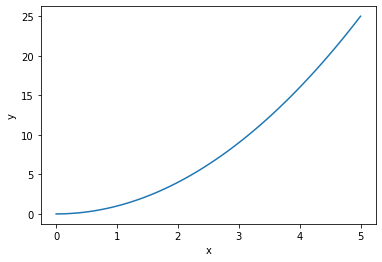

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Armed with this knowledge, we can do inserts:

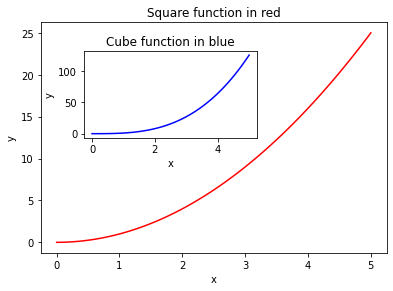

In [ ]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes. The structure is [left, bottom, width, height]
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # insert axes

# main figure
axes1.plot(x, y1, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Square function in red')

# insert
axes2.plot(x, y2, 'b')
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_title('Cube function in blue')
plt.show()

You can also do aribtrary grids of subplots. The function `plt.subplots` conveniently creates you the figure object and returns it to you along with the axes:

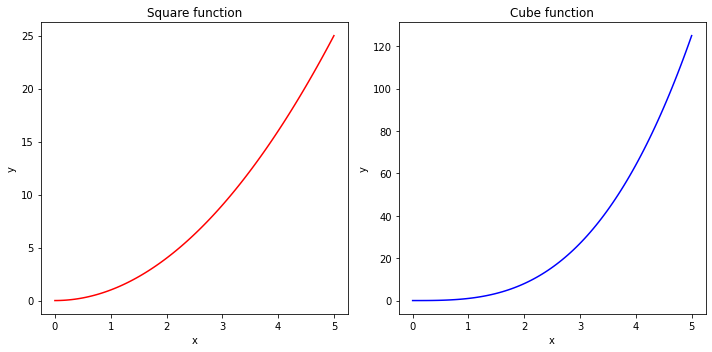

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize = (10,5))
y = [y1, y2]
labels = ['Square function', 'Cube function']
colors = ['r', 'b']
for i, ax in enumerate(axes):
    ax.plot(x, y[i], colors[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(labels[i])  
fig.tight_layout()  # Option to prevent overlapping of the plots
plt.show()

An always useful thing is to label different plots on the same figure and display the legend with the corresponding labels. The easiest way to do this is assigning a label to each of the plots when calling the `plot()` function, and at the end of the image calling the function `legend()`:

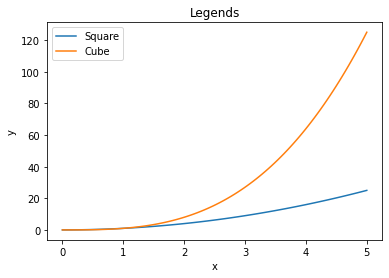

In [ ]:
fig, ax = plt.subplots()  # Equivalent to fig = plt.figure() and ax = fig.add_subplot(111)
ax.plot(x, y1, label='Square')
ax.plot(x, y2, label='Cube')
ax.legend(loc=2)  # Location of the legend can be modified with this parameter
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Legends')
plt.show()

Error bars can be added in both the $x$ and $y$ axes. This is achieved using the `errorbar` function

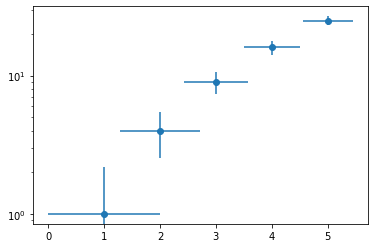

In [ ]:
xs = np.linspace(1, 5, 5)
ys = xs ** 2
xerr = 1 / np.sqrt(xs)
yerr = xs ** (1 / 3) + [0.2 for _ in xs]

fig, ax = plt.subplots()
ax.errorbar(xs, ys, xerr=xerr, yerr=yerr, ls='none', fmt='o')    # ls is for line style, fmt for format
ax.set_yscale('log')
plt.show()

Matplotlib can also handle LaTeX formulas and font changes. LaTeX formulas need to be enclosed in $$, preceded by an `r` to avoid problems with backslashes. For global font changes, one has to update the Matplotlib configuration parameters. TeX can be used to process all the text in the figure as well, although a TeX compiler is needed in this case.

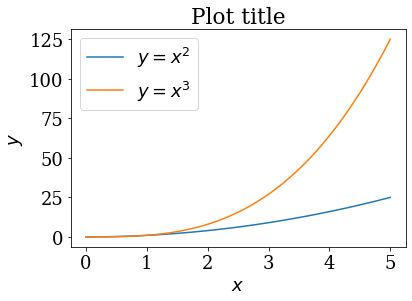

RuntimeError: ignored

<Figure size 432x288 with 1 Axes>

In [ ]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

fig, ax = plt.subplots()
ax.plot(x, y1, label=r'$y = x^2$')
ax.plot(x, y2, label=r'$y = x^3$')
ax.legend(loc=2)  # upper left corner
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Plot title')
plt.show()

matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

fig, ax = plt.subplots()
ax.plot(x, y1, label=r'$y = x^2$')
ax.plot(x, y2, label=r'$y = x^3$')
ax.legend(loc=2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Plot title')
plt.show()

# Restore to defaults
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

Matplotlib can also handle 3-dimensional plots. For that we need to import the 3-dimensional axes submodule

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

And now we can, for instance, plot surfaces

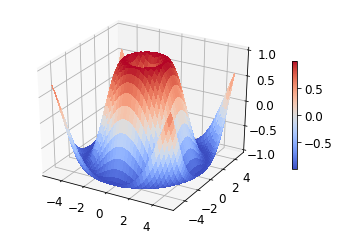

In [ ]:
X = np.linspace(-5, 5, 40)
Y = np.arange(-5, 5, 0.25)  # Defining an array of equi-spaced numbers
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=matplotlib.cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5)

plt.show()

The rest is all about exploring the parameter space. Here we manually create a grid (this is necessary if we mix 2D, 3D or polar coordinates), and plot a bunch of things that Matplotlib can do. For more examples, refer to the [gallery](http://matplotlib.org/gallery.html).

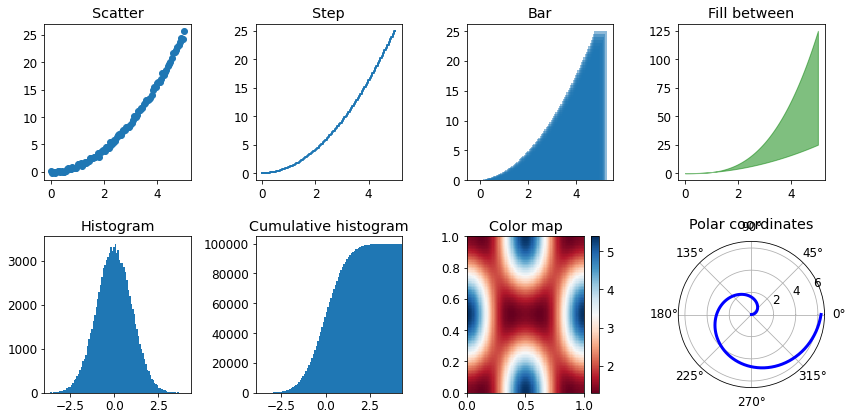

In [ ]:
# Some new data will be necessary
n = np.random.randn(100000)
t = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(t, t)
Z = (2.7 - 2 * np.cos(Y) * np.cos(X) - 0.7 * np.cos(np.pi - 2*Y)).T

# The actual plot
fig = plt.figure(figsize=(12, 6))
axes = [[],[]]

axes[0].append(fig.add_subplot(2, 4, 1))
axes[0][0].scatter(x, x ** 2 + 0.25 * np.random.randn(len(x)))
axes[0][0].set_title('Scatter')

axes[0].append(fig.add_subplot(2, 4, 2))
axes[0][1].step(x, y1, lw=2)
axes[0][1].set_title('Step')

axes[0].append(fig.add_subplot(2, 4, 3))
axes[0][2].bar(x, y1, align='center', width=0.5, alpha=0.5)
axes[0][2].set_title('Bar')

axes[0].append(fig.add_subplot(2, 4, 4))
axes[0][3].fill_between(x, y1, y2, color='green', alpha=0.5);
axes[0][3].set_title('Fill between');

axes[1].append(fig.add_subplot(2, 4, 5))
axes[1][0].hist(n, bins=100)
axes[1][0].set_title('Histogram')
axes[1][0].set_xlim((min(n), max(n)))

axes[1].append(fig.add_subplot(2, 4, 6))
axes[1][1].hist(n, bins=100, cumulative=True)
axes[1][1].set_title('Cumulative histogram')
axes[1][1].set_xlim((min(n), max(n)))

axes[1].append(fig.add_subplot(2, 4, 7))
p = axes[1][2].pcolor(X / (2 * np.pi), Y / (2 * np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
axes[1][2].set_title('Color map')
fig.colorbar(p, ax=axes[1][2])

axes[1].append(fig.add_subplot(2, 4, 8, polar=True))
axes[1][3].plot(t, t, color='blue', lw=3);
axes[1][3].set_title('Polar coordinates')

fig.tight_layout()
plt.show()

**Exercise 1**. Create a three by three grid. Put the BIST logo in the center. Surround him with aesthetically pleasing functions in the remaining subplots. Hint: `matplotlib.image.imread("http://bist.eu/wp-content/uploads/2016/05/BIST-7-centres-GRISOS.png")` will get you the BIST logo, and the function `imshow` will plot it.

### Seaborn and Pandas

Seaborn is primarily meant for statistical plotting, but it also improves the defaults of all Matplotlib figures.

#### Side Effect of Importing Seaborn
 
Witness the magic:

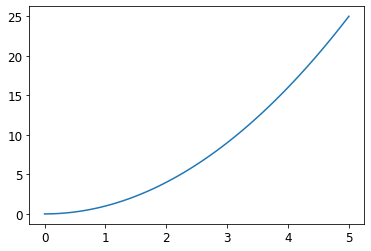

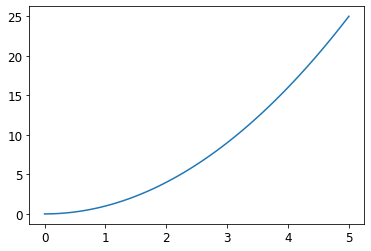

In [ ]:
plt.plot(x, x**2)
plt.show()
import seaborn as sns
plt.plot(x, x**2)
plt.show()

#### Add Pandas

Pandas turns Python into a competitor to R. It allows you to do a wide-scale of statistical operations, but even more importantly, it makes low-level data processing chores easy. Here we load the standard Iris dataset from the web and convert it to a Pandas dataframe, which is the key data structure of the package.

In [ ]:
import pandas as pd

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Plotting with Pandas can be as easy as calling the `plot` command of the dataset.

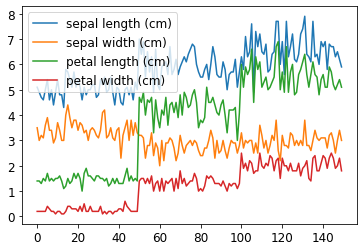

In [ ]:
iris.plot()

We will however use seaborn for some still basic but nicer and more complete visualization

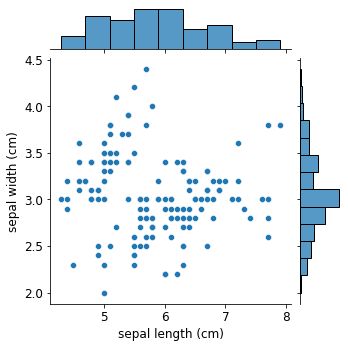

In [ ]:
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, height=5);

Let us define an array with all the names of the features and plot their correlations. 

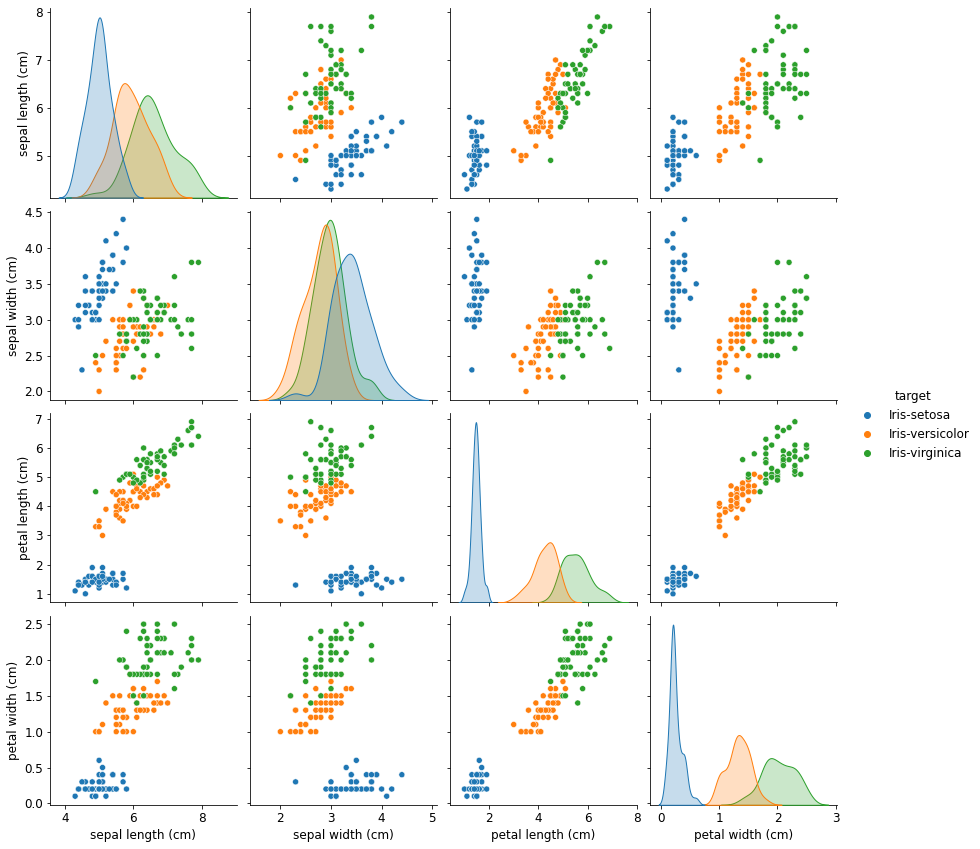

In [ ]:
features = iris.columns.values[:-1]
sns.pairplot(iris, vars=features, hue='target', height=3);

**Exercise 2**. Plot the histogram of all four features. First, instantiate a Matplotlib figure in a one by four grid, and then pass the matching axes to Seaborn's `distplot` function that draws the histograms. A `figsize=(14, 4)` is a recommended parameter to `plt.subplots`, otherwise the figure will be too squished.

*Optional: Use `zip` to iterate over the axes and the features simultaneously.*

The curve you see in the image is the kernel density estimation, the density function that better approximates the observed distribution

You might have noticed by now than Seaborn not only produces nicer plots, but also sometimes performs some data analysis on its own. Recall the `jointplot` a few steps above, where we were getting the Pearson's $r$ coefficient and the corresponding $p$ value. There is a special argument that you can pass to `jointplot` to plot a more complete analysis with the regression line, confidence intervals and kernel density estimation, the `kind` option:

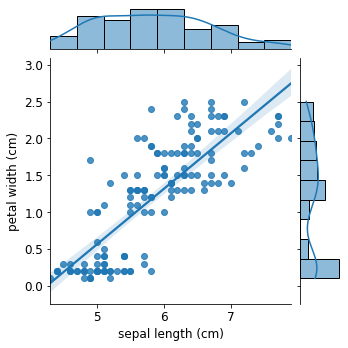

In [ ]:
sns.jointplot(x='sepal length (cm)', y='petal width (cm)', data=iris, height=5, kind='reg')

However, for general regression the most common plot is the `regplot`. It can perform linear and simple nonlinear regressions, eliminate outliers, and easily plot conditional data, among others. There is a nice tutorial on all these functionalities [here](https://seaborn.pydata.org/tutorial/regression.html).

For instance, we can fit data to high-order polynomials by passing the argument `order`:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

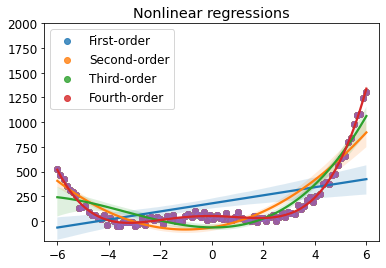

In [ ]:
x = np.linspace(-6, 6, 100)
y = x ** 4 + 2 * x ** 3 - 12 * x ** 2 - 2 * x + 6 * np.ones(len(x))
y = y + 100 * np.random.rand(len(x))

sns.regplot(x, y, label='First-order')
sns.regplot(x, y, order=2, label='Second-order')
sns.regplot(x, y, order=3, label='Third-order')
sns.regplot(x, y, order=4, label='Fourth-order')
sns.regplot(x, y, fit_reg=False)    # Plot the data in another color

plt.xlim(-6.5,6.5)
plt.ylim(-200,2000)

plt.legend()
plt.title('Nonlinear regressions')
plt.show()

**Exercise 3**. Plot the marginal distributions of `petal length` versus `sepal length` for each of the three families of  flowers. First plot the three of them in the same plot, then do it on separate subplots. Note that when you are doing the three on the same plot, you will have to modify your axes length to see all the data.